In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import ttest_ind
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from matplotlib import cm

In [58]:
df = pd.read_csv("df_final_with_descriptors.csv")
df = pd.DataFrame(df)
df

,Unnamed: 0,Date,Journal,Title,Name,wavelength_added,RI,DOI_alt,SMILES,Method_ord,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0,5/25/2011,Physical Chemistry Chemical Physics,Kirkwood correlation factors in liquid mixture...,Triglyme,589.0,1.421120,10.1039/C1CP20142E,COCCOCCOCCOC,1,...,0.946528,0.031934,0.549275,0.526084,0.492699,19.717294,19.944032,44.651635,0.919793,1.568058
1,1,9/13/1999,Journal of Alloys and Compounds,GROWTHOPTICALPROPERTIESREDOPEDBULKFIBERSINGLEC...,YVO4,589.0,2.168000,10.1016/S0925-8388(98)00420-4,[O-2].[O-2].[O-2].[O-2].[V].[Y+3],1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3/4/1999,Colloids and Surfaces A: Physicochemical and E...,ADSORPTIONOILSURFACTANTMONOLAYERSSTRUCTUREMIXE...,Toluene,589.0,1.494000,10.1016/S0927-7757(98)00782-1,CC1=CC=CC=C1,1,...,0.645928,0.332469,0.550605,0.453388,0.125625,5.009615,5.919881,11.512744,0.468892,1.129618
3,3,8/5/2004,Materials Science and Engineering: B,Fabrication of PECVD-silicon oxynitride-based ...,silicon dioxide,589.0,1.460000,10.1016/j.mseb.2004.05.037,O=[Si]=O,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,12/1/2016,Optik,OPTIMIZATIONENHANCEMENTLIQUIDANALYTESENSINGPER...,Benzyne,589.0,1.354000,10.1016/j.ijleo.2016.11.171,C1=CC#CC=C1,2,...,0.560564,0.426347,0.464710,0.524683,0.276782,3.839450,3.713540,7.730048,0.480366,1.266175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,2968,7/30/2011,Thermochimica Acta,THERMOPHYSICALSTUDYNHEXANENHEPTANE1CHLOROPROPA...,n-Heptane,589.0,1.390333,10.1016/j.tca.2011.07.023,CCCCCCC,0,...,0.856853,0.086350,0.562047,0.557496,0.590060,8.745269,9.755805,21.311787,0.785279,1.709602
2969,2969,6/9/2015,RSC Adv.,Semitransparent polymer-based solar cells via ...,TiO2,26.0,1.640000,10.1039/C5RA05762K,O=[Ti]=O,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2970,2970,6/17/2015,Phys. Chem. Chem. Phys.,Transformation of photophysical properties fro...,"1,4-Dioxane",589.0,1.420300,10.1039/C5CP02762D,C1COCCO1,0,...,0.552766,0.330474,0.649745,0.843263,0.503156,4.024970,4.630103,10.045862,0.329148,1.996164
2971,2971,4/13/2017,Vibrational Spectroscopy,IMPROVEMENTSTIO2CATALYZEDAGNPSBASEDSERSSUBSTRA...,TiO2,589.0,1.630000,10.1016/j.vibspec.2017.03.005,O=[Ti]=O,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


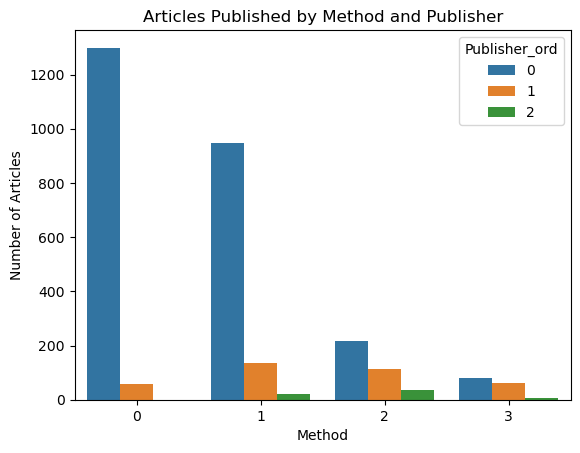

In [59]:
# Group the data by publisher and method, and count the number of articles in each group
df_grouped = df.groupby(['Publisher_ord', 'Method_ord'])['Title'].count().reset_index()

# Create a bar plot with the method on the x-axis, and the number of articles on the y-axis, colored by publisher
sns.barplot(x='Method_ord', y='Title', hue='Publisher_ord', data=df_grouped)

plt.xlabel('Method')
plt.ylabel('Number of Articles')
plt.title('Articles Published by Method and Publisher')

plt.show()

In [60]:
# Select only numerical columns
num_cols = df.select_dtypes(include='number').columns.tolist()

# Drop non-numerical columns
df = df[num_cols]

In [61]:
# Check number of unique values in each column
unique_counts = df.nunique()

# Get column names with only one unique value
to_drop = unique_counts[unique_counts == 1].index.tolist()

# Drop columns with only one unique value
df = df.drop(to_drop, axis=1)

In [62]:
df = df.drop(columns= 'Unnamed: 0')

In [63]:
# maybe that's wrong...
# Replace NaN values with a numerical value (e.g. 0)
df = df.fillna(0)

# Replace inf values with a numerical value (e.g. large positive or negative value)
df = df.replace([np.inf, -np.inf], [np.finfo(np.float64).max, np.finfo(np.float64).min])

In [64]:
df1 = df.groupby(['Method_ord'])['Method_ord'].count()
df1

Method_ord
0    1357
1    1103
2     366
3     147
Name: Method_ord, dtype: int64

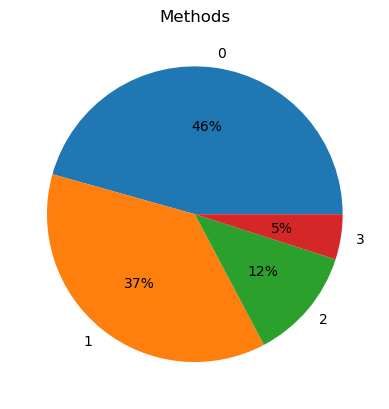

In [65]:
# Count the number of occurrences of each unique value in the column
value_counts = df['Method_ord'].value_counts()

# Create the pie chart
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.0f%%')

# Add a title
plt.title('Methods')

# Show the pie chart
plt.show()


Text(0.5, 1.0, 'Method_ord')

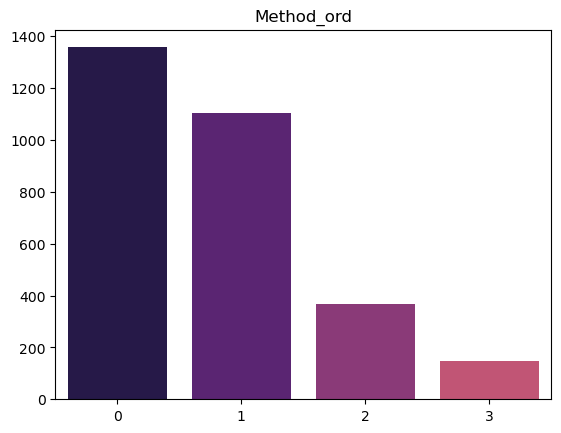

In [66]:
# plot shows which measument methods were used to get refractive indexes for this dataset
df2 = df.groupby(['Method_ord'])['Method_ord'].count().sort_values(ascending=False)
labels = list(df2.keys())
data = list(df2)
sns.barplot(x=labels, y=data, palette=sns.color_palette("magma")).set_title('Method_ord')

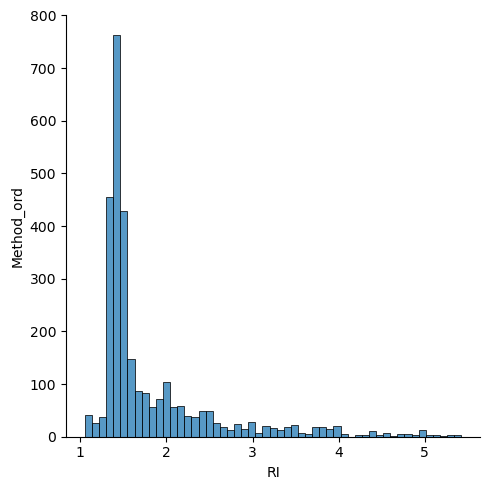

In [67]:
g=sns.displot(df, x='RI')
g.set_axis_labels('RI', 'Method_ord')

In [71]:
desc = df[['wavelength_added', 'RI','MolecularWeight', 'XLogP', 'ExactMass', 'MonoisotopicMass', 'TPSA', 'Complexity', 'Charge', 'HBondDonorCount', 'HBondAcceptorCount', 'RotatableBondCount', 'HeavyAtomCount', 'AtomStereoCount']]
#Delete lines from None
desc = desc.dropna()
desc

,wavelength_added,RI,MolecularWeight,XLogP,ExactMass,MonoisotopicMass,TPSA,Complexity,Charge,HBondDonorCount,HBondAcceptorCount,RotatableBondCount,HeavyAtomCount,AtomStereoCount
0,589.0,1.421120,178.230,-0.5,178.120509,178.120509,36.9,67.0,0.0,0.0,4.0,9.0,12.0,0.0
1,589.0,2.168000,203.845,0.0,203.829454,203.829454,4.0,0.0,-5.0,0.0,4.0,0.0,6.0,0.0
2,589.0,1.494000,92.140,2.7,92.062600,92.062600,0.0,42.0,0.0,0.0,0.0,0.0,7.0,0.0
3,589.0,1.460000,60.084,0.0,59.966756,59.966756,34.1,18.0,0.0,0.0,2.0,0.0,3.0,0.0
4,589.0,1.354000,76.100,2.0,76.031300,76.031300,0.0,25.0,0.0,0.0,0.0,0.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,589.0,1.390333,100.200,4.4,100.125201,100.125201,0.0,19.0,0.0,0.0,0.0,4.0,7.0,0.0
2969,26.0,1.640000,79.866,0.0,79.937770,79.937770,34.1,18.0,0.0,0.0,2.0,0.0,3.0,0.0
2970,589.0,1.420300,88.110,-0.3,88.052429,88.052429,18.5,26.0,0.0,0.0,2.0,0.0,6.0,0.0
2971,589.0,1.630000,79.866,0.0,79.937770,79.937770,34.1,18.0,0.0,0.0,2.0,0.0,3.0,0.0


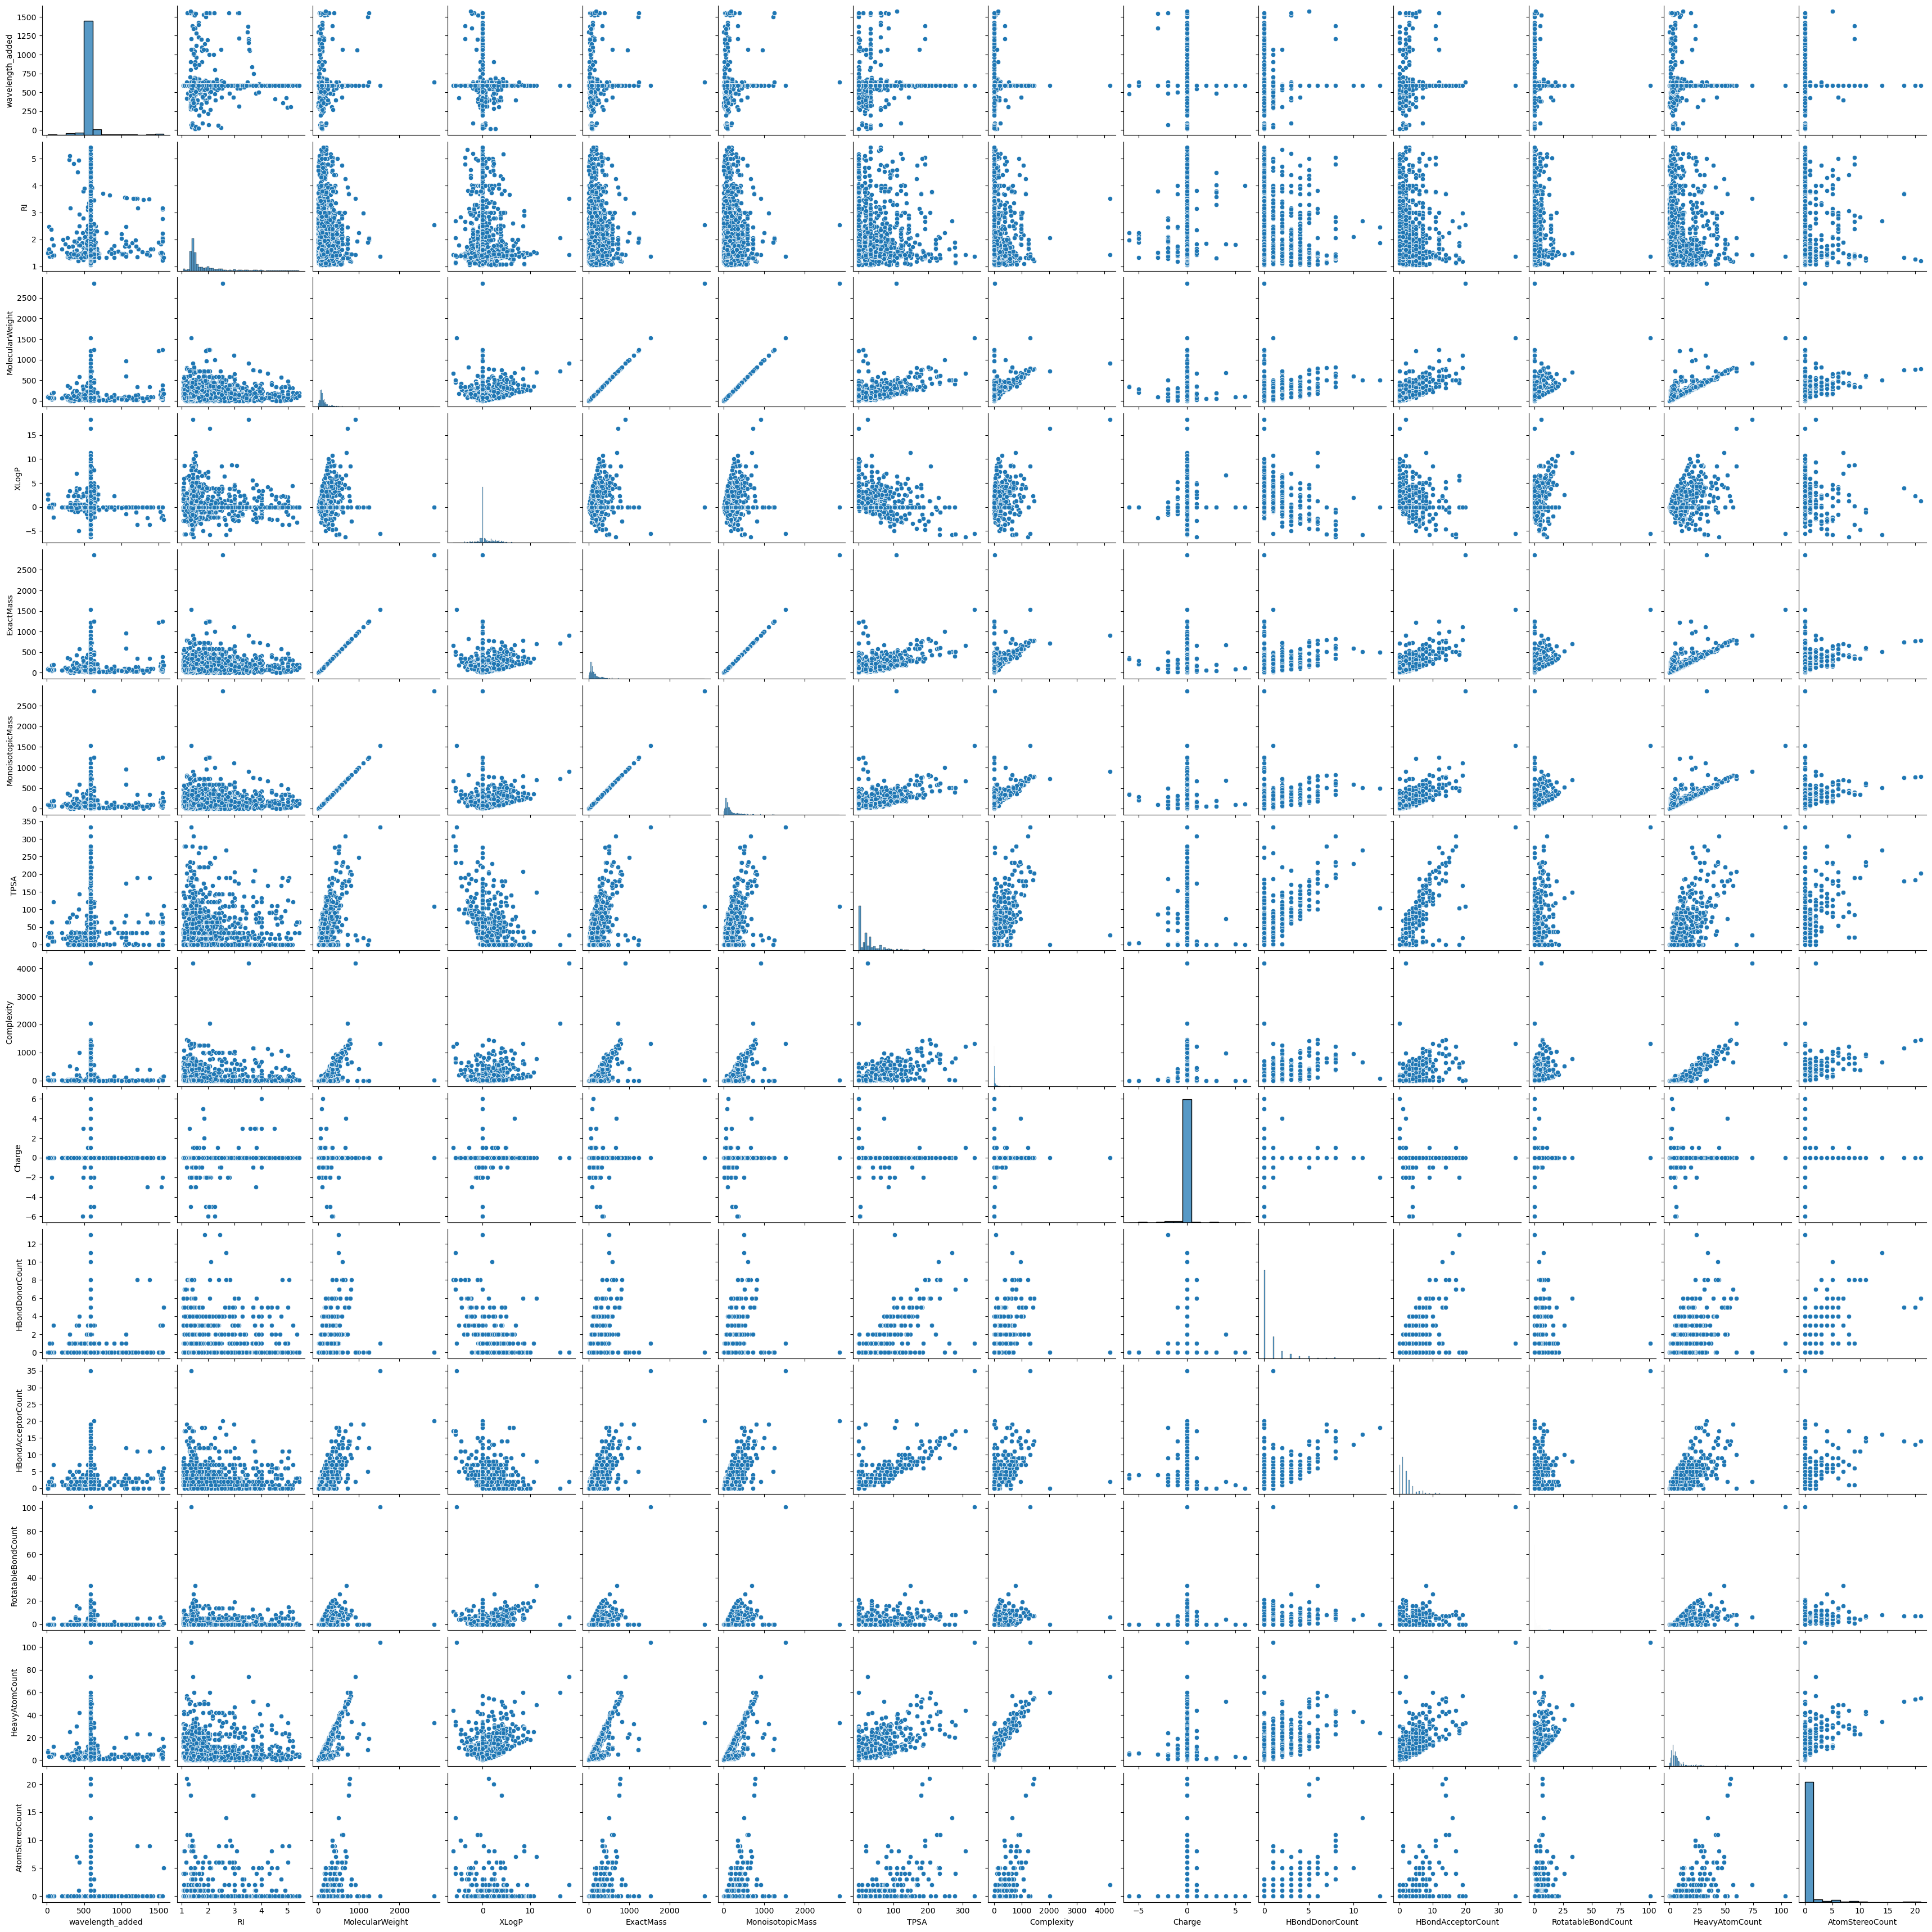

In [72]:
sns.pairplot(desc)

In [73]:
violin = df[['Method_ord', 'wavelength_added', 'RI','MolecularWeight', 'XLogP', 'ExactMass', 'MonoisotopicMass', 'TPSA', 'Complexity', 'Charge', 'HBondDonorCount', 'HBondAcceptorCount', 'RotatableBondCount', 'HeavyAtomCount', 'AtomStereoCount']]
#Delete lines from None
violin = violin.dropna()
violin

,Method_ord,wavelength_added,RI,MolecularWeight,XLogP,ExactMass,MonoisotopicMass,TPSA,Complexity,Charge,HBondDonorCount,HBondAcceptorCount,RotatableBondCount,HeavyAtomCount,AtomStereoCount
0,1,589.0,1.421120,178.230,-0.5,178.120509,178.120509,36.9,67.0,0.0,0.0,4.0,9.0,12.0,0.0
1,1,589.0,2.168000,203.845,0.0,203.829454,203.829454,4.0,0.0,-5.0,0.0,4.0,0.0,6.0,0.0
2,1,589.0,1.494000,92.140,2.7,92.062600,92.062600,0.0,42.0,0.0,0.0,0.0,0.0,7.0,0.0
3,3,589.0,1.460000,60.084,0.0,59.966756,59.966756,34.1,18.0,0.0,0.0,2.0,0.0,3.0,0.0
4,2,589.0,1.354000,76.100,2.0,76.031300,76.031300,0.0,25.0,0.0,0.0,0.0,0.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,0,589.0,1.390333,100.200,4.4,100.125201,100.125201,0.0,19.0,0.0,0.0,0.0,4.0,7.0,0.0
2969,0,26.0,1.640000,79.866,0.0,79.937770,79.937770,34.1,18.0,0.0,0.0,2.0,0.0,3.0,0.0
2970,0,589.0,1.420300,88.110,-0.3,88.052429,88.052429,18.5,26.0,0.0,0.0,2.0,0.0,6.0,0.0
2971,2,589.0,1.630000,79.866,0.0,79.937770,79.937770,34.1,18.0,0.0,0.0,2.0,0.0,3.0,0.0


C:\Users\user\AppData\Local\Temp\ipykernel_10948\4166711142.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.axes[6, 0].set_xticklabels(g.axes[6, 0].get_xticks(), rotation = 90) #Turn captions to charts


IndexError: index 1 is out of bounds for axis 1 with size 1

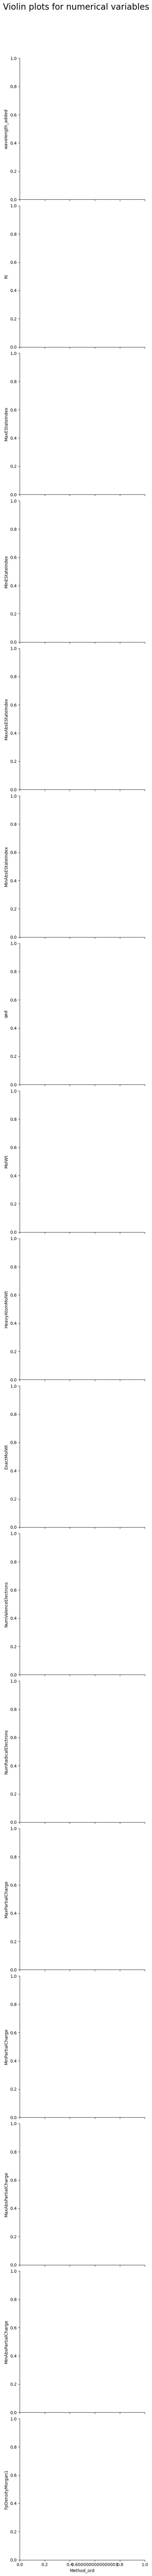